#### Red Wine Quality Prediction Project



In [1]:
import pandas as pd
import numpy as np
import seaborn  as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [12]:
#loading file
df_wine=pd.read_csv(r"winequality-red.csv")

In [41]:
#displaying first 5 records of Dataframe
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [176]:
#shape of df
df_wine.shape

(1599, 12)

Observation:
    There are total 1599 Rows and 12 Columns.


In [177]:
#information of dataframe
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Observations:  
    1)All columns has 1599 records that means there are no null values.  
    2)All columns having numerical(int,float) data. 11columns having float and 1 column is of int type.
    

In [178]:
#checking for null values
df_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Observations:We can see there are no null values any any column.

<AxesSubplot:>

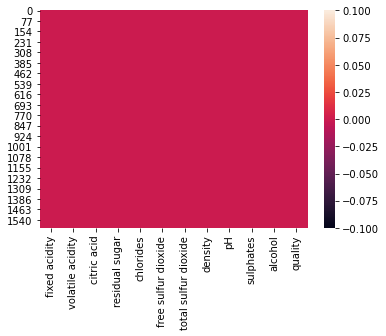

In [179]:
#visualize using heatmap
sns.heatmap(df_wine.isnull())

Observation:
    since thruoghout the graph we have same color .We can say there are no null values.

In [180]:
df_wine.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [181]:
#checking value count of each column
for i in df_wine.columns:
    print(df_wine[i] ,":",df_wine[i].value_counts())
    print("\n")

0        7.4
1        7.8
2        7.8
3       11.2
4        7.4
        ... 
1594     6.2
1595     5.9
1596     6.3
1597     5.9
1598     6.0
Name: fixed acidity, Length: 1599, dtype: float64 : 7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
4.6      1
13.5     1
4.9      1
15.9     1
14.3     1
Name: fixed acidity, Length: 96, dtype: int64


0       0.700
1       0.880
2       0.760
3       0.280
4       0.700
        ...  
1594    0.600
1595    0.550
1596    0.510
1597    0.645
1598    0.310
Name: volatile acidity, Length: 1599, dtype: float64 : 0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
0.975     1
0.845     1
0.865     1
1.180     1
1.115     1
Name: volatile acidity, Length: 143, dtype: int64


0       0.00
1       0.00
2       0.04
3       0.56
4       0.00
        ... 
1594    0.08
1595    0.10
1596    0.13
1597    0.12
1598    0.47
Name: citric acid, Length: 1599, dtype: float64 : 0.00    132
0.49     68
0.24     51
0.02     50
0.

In [182]:
#checking unique values n its count count of each column
for i in df_wine.columns:
    print(df_wine[i] ,"unique values are :",df_wine[i].unique())
    print(df_wine[i] ,"unique values counts are :",df_wine[i].nunique())
    print("\n")

0        7.4
1        7.8
2        7.8
3       11.2
4        7.4
        ... 
1594     6.2
1595     5.9
1596     6.3
1597     5.9
1598     6.0
Name: fixed acidity, Length: 1599, dtype: float64 unique values are : [ 7.4  7.8 11.2  7.9  7.3  7.5  6.7  5.6  8.9  8.5  8.1  7.6  6.9  6.3
  7.1  8.3  5.2  5.7  8.8  6.8  4.6  7.7  8.7  6.4  6.6  8.6 10.2  7.
  7.2  9.3  8.   9.7  6.2  5.   4.7  8.4 10.1  9.4  9.   8.2  6.1  5.8
  9.2 11.5  5.4  9.6 12.8 11.  11.6 12.  15.  10.8 11.1 10.  12.5 11.8
 10.9 10.3 11.4  9.9 10.4 13.3 10.6  9.8 13.4 10.7 11.9 12.4 12.2 13.8
  9.1 13.5 10.5 12.6 14.  13.7  9.5 12.7 12.3 15.6  5.3 11.3 13.   6.5
 12.9 14.3 15.5 11.7 13.2 15.9 12.1  5.1  4.9  5.9  6.   5.5]
0        7.4
1        7.8
2        7.8
3       11.2
4        7.4
        ... 
1594     6.2
1595     5.9
1596     6.3
1597     5.9
1598     6.0
Name: fixed acidity, Length: 1599, dtype: float64 unique values counts are : 96


0       0.700
1       0.880
2       0.760
3       0.280
4       0.700
     

#### Observations:
    1)from the above data we can see all columns except Quality column has continuous type of     data.  
    2)Though "Quality" column has 6 types of unique values compairing this with 1599 records we   will consider it as categorical column .  
    3)So the given problem statement becomes "CLASSIFICATION PROBLEM STATEMENT" .

### EDA
    

In [183]:
#setting graph parameters
sns.set_style()

plt.rcParams['figure.facecolor']='FFFFCB'

#### Univariate  Analysis

<AxesSubplot:xlabel='fixed acidity', ylabel='count'>

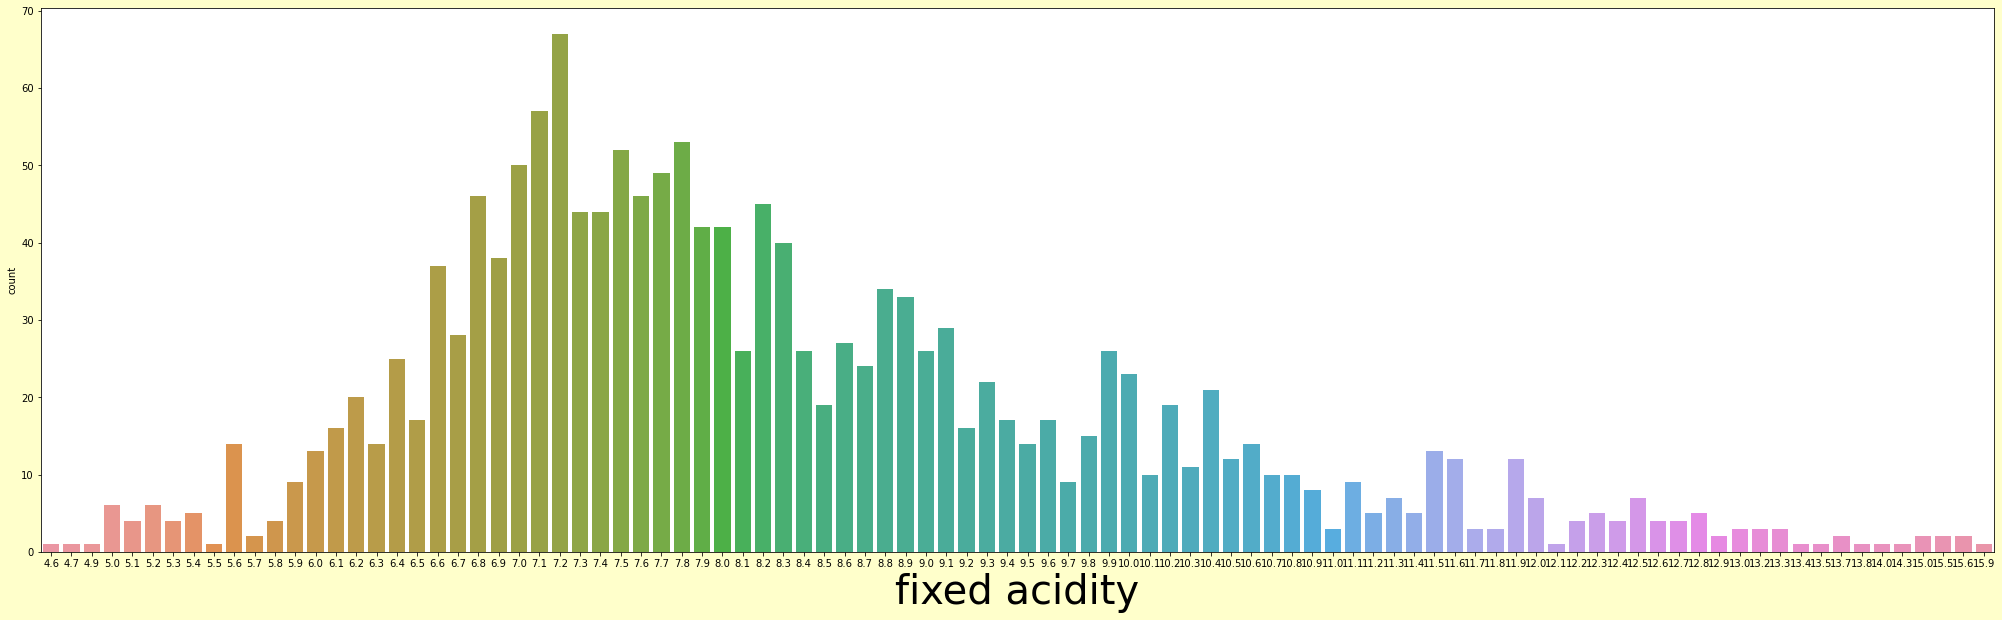

In [184]:
#Countplot visualization of 'fixed acidity'

plt.figure(figsize=(35,10))
plt.xlabel('fixed acidity',fontsize=40)
sns.countplot(df_wine['fixed acidity'])


1)We can observe as the acidity increases count starts decreasing after 10.9 .  
2)At 7.2 we can see max count is there.

0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
0.975     1
0.845     1
0.865     1
1.180     1
1.115     1
Name: volatile acidity, Length: 143, dtype: int64


<Figure size 2520x720 with 0 Axes>

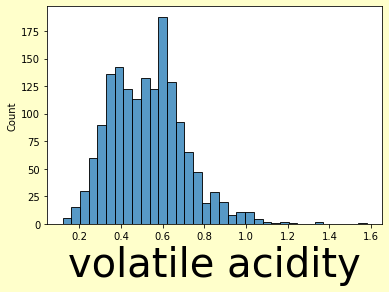

<Figure size 2520x720 with 0 Axes>

In [185]:
#Histplot visualization of 'volatile acidity'
print(df_wine['volatile acidity'].value_counts())
sns.histplot(df_wine['volatile acidity'])
plt.xlabel('volatile acidity',fontsize=40)
plt.figure(figsize=(35,10))

1)It is almost like bell shape kind of curve .   
2) Count for the 0.6 volatile acidity is highest .

0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
1.00      1
0.72      1
0.71      1
0.78      1
0.79      1
Name: citric acid, Length: 80, dtype: int64


Text(0.5, 0, 'citric acid')

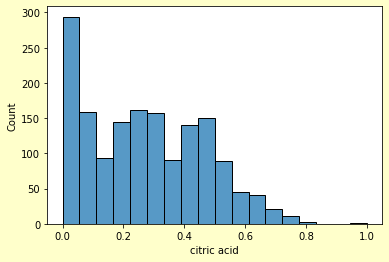

In [186]:
#histtplot visualization of 'citric acid'
print(df_wine['citric acid'].value_counts())
sns.histplot(df_wine['citric acid'])

plt.xlabel('citric acid',fontsize=10)

1)Maximun wine samples has 0 citric acid content in it .  
2)Count of wine samples which contains citic acid in range of 0.02 to 0.5 is between 38-50 .later on it starts decreasing.so max wines contains citric acid in this range .

2.00    156
2.20    131
1.80    129
2.10    128
1.90    117
       ... 
3.45      1
2.85      1
7.00      1
5.40      1
7.30      1
Name: residual sugar, Length: 91, dtype: int64


Text(0.5, 0, 'residual sugar')

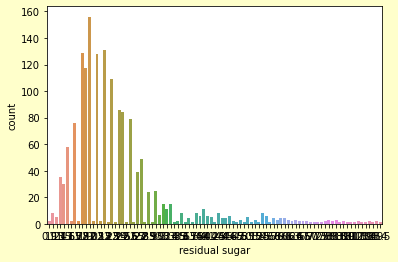

In [187]:
#Countplot visualization of 'residual sugar'
print(df_wine['residual sugar'].value_counts())
sns.countplot(df_wine['residual sugar'])

plt.xlabel('residual sugar',fontsize=10)

1)Max residual sugar containtis 15.5 where as minimum is 0.9.  
2)Most of the wine sample has residual containt in teh range of 1.6-3.0.  
3)Maximum no of sample has residual sugar containt is 0.2.

0.080    66
0.074    55
0.078    51
0.076    51
0.084    49
         ..
0.148     1
0.467     1
0.341     1
0.147     1
0.159     1
Name: chlorides, Length: 153, dtype: int64


Text(0.5, 0, 'chlorides')

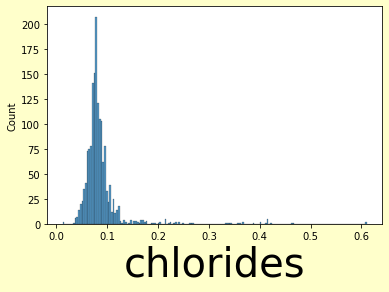

In [188]:
#histplot visualization of 'chlorides'
print(df_wine['chlorides'].value_counts())
sns.histplot(df_wine['chlorides'])

plt.xlabel('chlorides',fontsize=40)

1)It is almost Bell type of curve .    
2)Almost 87% of the wine sample contains chlorides in the arnge of 0.05 to 0.1.
3)66 samples contains 0.08 chlorides in it which is maximum count .

6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0     60
11.0     59
13.0     57
8.0      56
14.0     50
3.0      49
18.0     46
21.0     41
4.0      41
19.0     39
24.0     34
26.0     32
23.0     32
20.0     30
27.0     29
25.0     24
28.0     23
29.0     23
32.0     22
22.0     22
31.0     20
34.0     18
30.0     16
35.0     15
33.0     11
36.0     11
38.0      9
41.0      7
40.0      6
39.0      5
51.0      4
48.0      4
45.0      3
43.0      3
1.0       3
42.0      3
52.0      3
37.0      3
68.0      2
55.0      2
50.0      2
37.5      2
66.0      1
2.0       1
46.0      1
47.0      1
40.5      1
53.0      1
57.0      1
5.5       1
72.0      1
54.0      1
Name: free sulfur dioxide, dtype: int64


Text(0.5, 0, 'free sulfur dioxide')

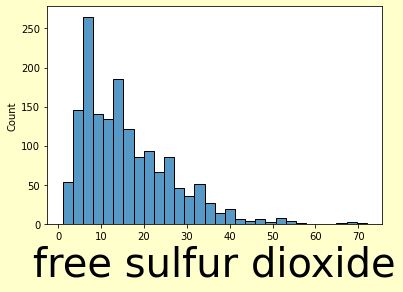

In [189]:
#histplot visualization of 'free sulfur dioxide'
print(df_wine['free sulfur dioxide'].value_counts())
sns.histplot(df_wine['free sulfur dioxide'])

plt.xlabel('free sulfur dioxide',fontsize=40)

1)It is left shifted curve .      
2)Almost 90% of the wine sample contains free sulfur dioxide in the arnge of 0.25 to 36.  
3)138 samples contains 0.6 free sulfur dioxide in it which is maximum count .

28.0     43
24.0     36
18.0     35
15.0     35
23.0     34
         ..
126.0     1
140.0     1
160.0     1
116.0     1
153.0     1
Name: total sulfur dioxide, Length: 144, dtype: int64


Text(0.5, 0, 'total sulfur dioxide')

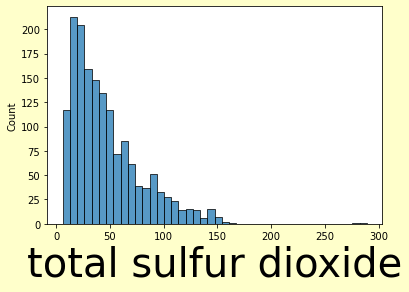

In [190]:
#histplot visualization of 'total sulfur dioxide'
print(df_wine['total sulfur dioxide'].value_counts())
sns.histplot(df_wine['total sulfur dioxide'])

plt.xlabel('total sulfur dioxide',fontsize=40)

1)It is left shifted curve .      
2)Almost 90% of the wine sample contains free sulfur dioxide in the arnge of 0.25 to 36.  
3)138 samples contains 0.6 free sulfur dioxide in it which is maximum count .

0.99720    36
0.99680    35
0.99760    35
0.99800    29
0.99620    28
           ..
0.99517     1
0.99823     1
0.99456     1
0.99935     1
0.99569     1
Name: density, Length: 436, dtype: int64


Text(0.5, 0, 'density')

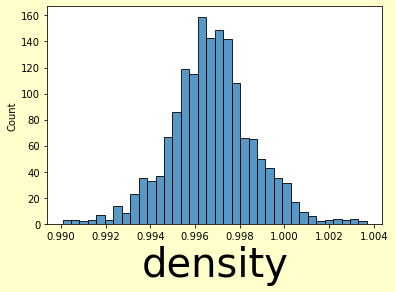

In [191]:
#histplot visualization of 'density'
print(df_wine['density'].value_counts())
sns.histplot(df_wine['density'])

plt.xlabel('density',fontsize=40)

1)It is Bell shaped curve means data is normalized.      
2)Almost 90% of the wine sample contains free sulfur dioxide in the arnge of 0.994 to 1.0.  


3.30    57
3.36    56
3.26    53
3.38    48
3.39    48
        ..
2.86     1
3.75     1
2.74     1
2.90     1
3.74     1
Name: pH, Length: 89, dtype: int64


Text(0.5, 0, 'pH')

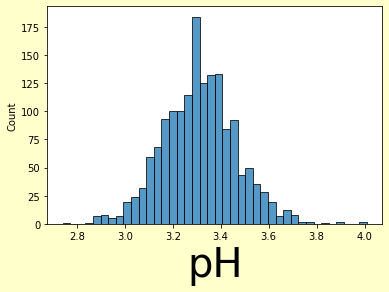

In [192]:
#histplot visualization of 'pH'
print(df_wine['pH'].value_counts())
sns.histplot(df_wine['pH'])
plt.rcParams['figure.figsize']=(45,15)
plt.xlabel('pH',fontsize=40)

1)It is Bell shaped curve means data is normalized.      
2)Almost 90% of the wine sample contains pH in the arnge of 0.3 to 0.36.  

0.60    69
0.58    68
0.54    68
0.62    61
0.56    60
        ..
1.31     1
1.34     1
1.61     1
1.11     1
1.15     1
Name: sulphates, Length: 96, dtype: int64


Text(0.5, 0, 'sulphates')

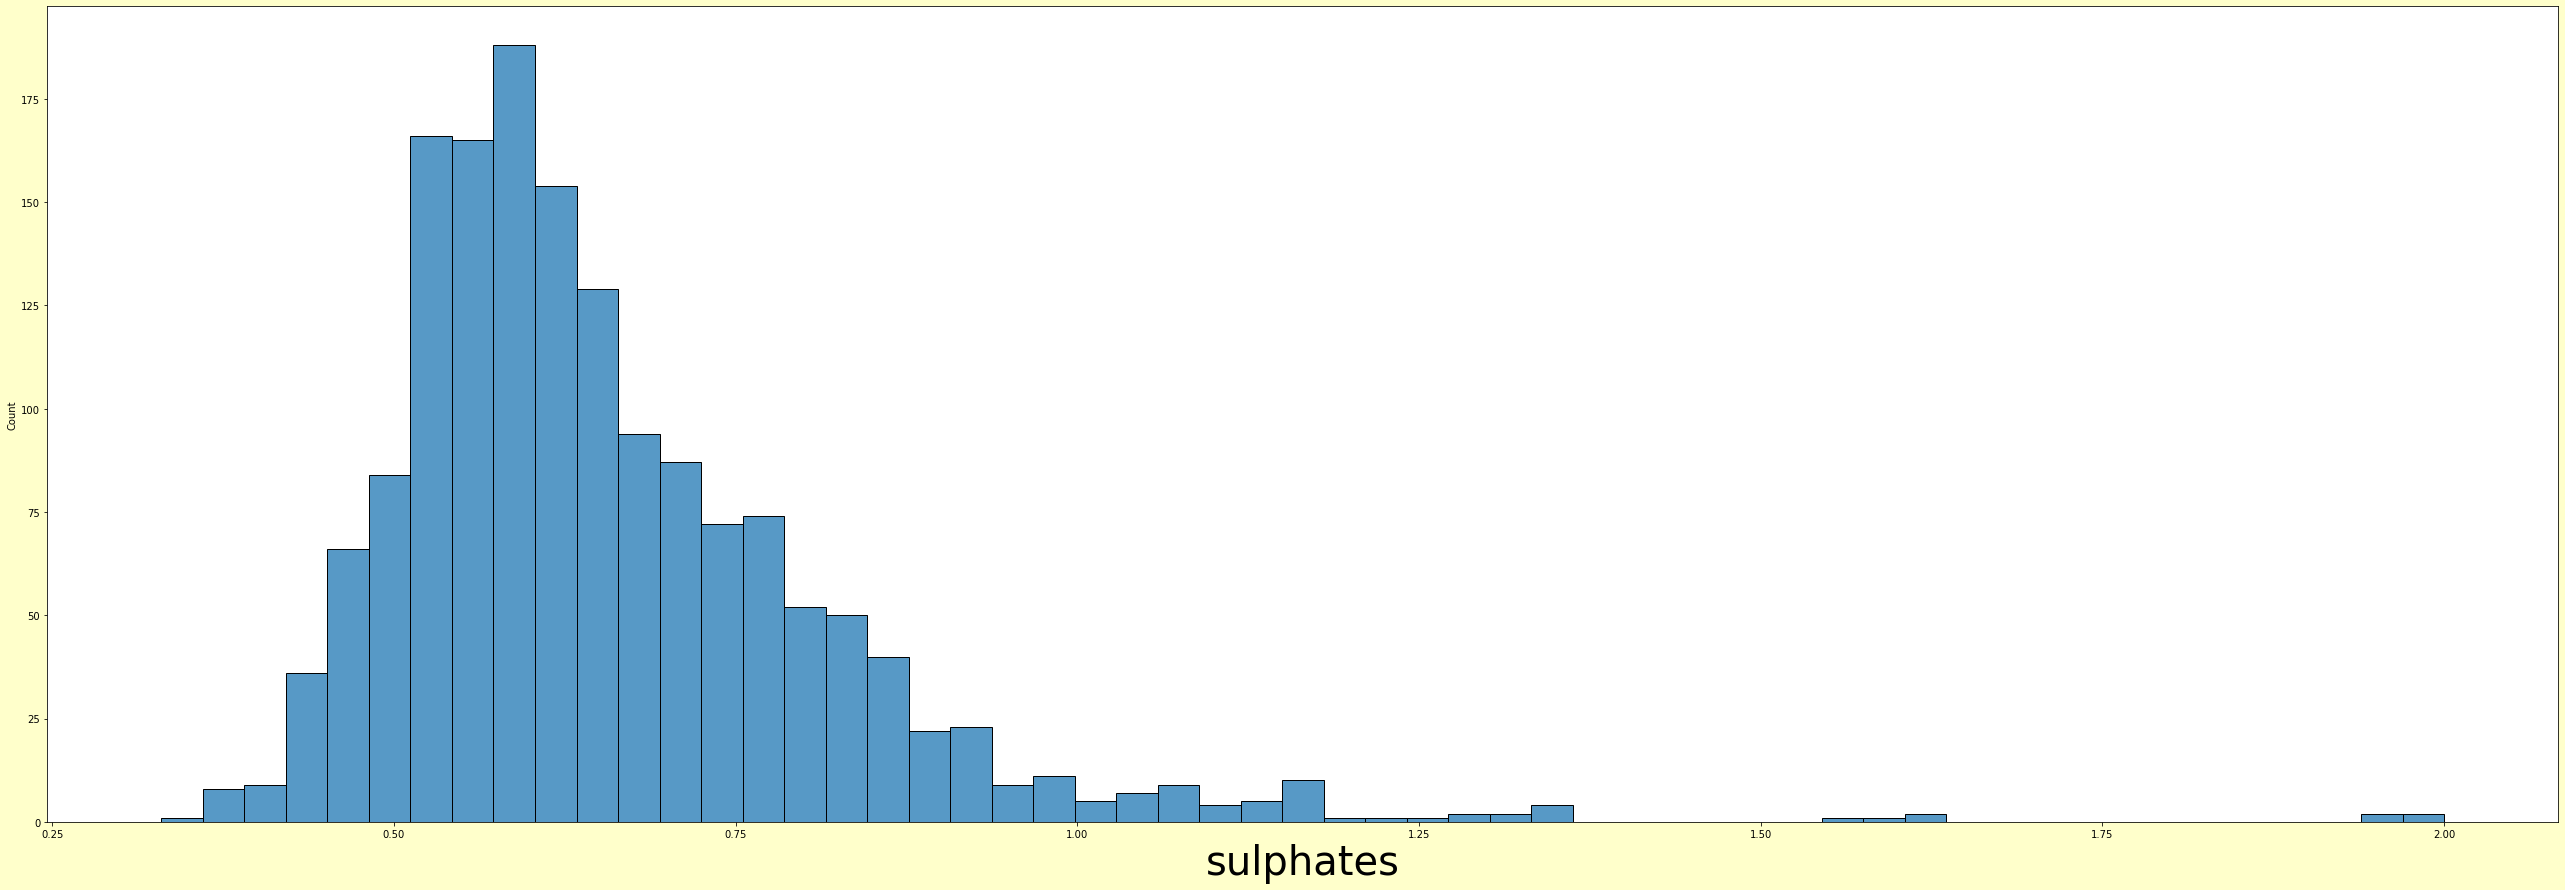

In [193]:
#histplot visualization of 'sulphates'
print(df_wine['sulphates'].value_counts())
sns.histplot(df_wine['sulphates'])

plt.xlabel('sulphates',fontsize=40)

1)Most of the wins have Sulphate in the range of 0.5 to 0.8 .  


9.50     139
9.40     103
9.80      78
9.20      72
10.50     67
        ... 
9.05       1
13.50      1
10.75      1
11.95      1
9.25       1
Name: alcohol, Length: 65, dtype: int64


Text(0.5, 0, 'alcohol')

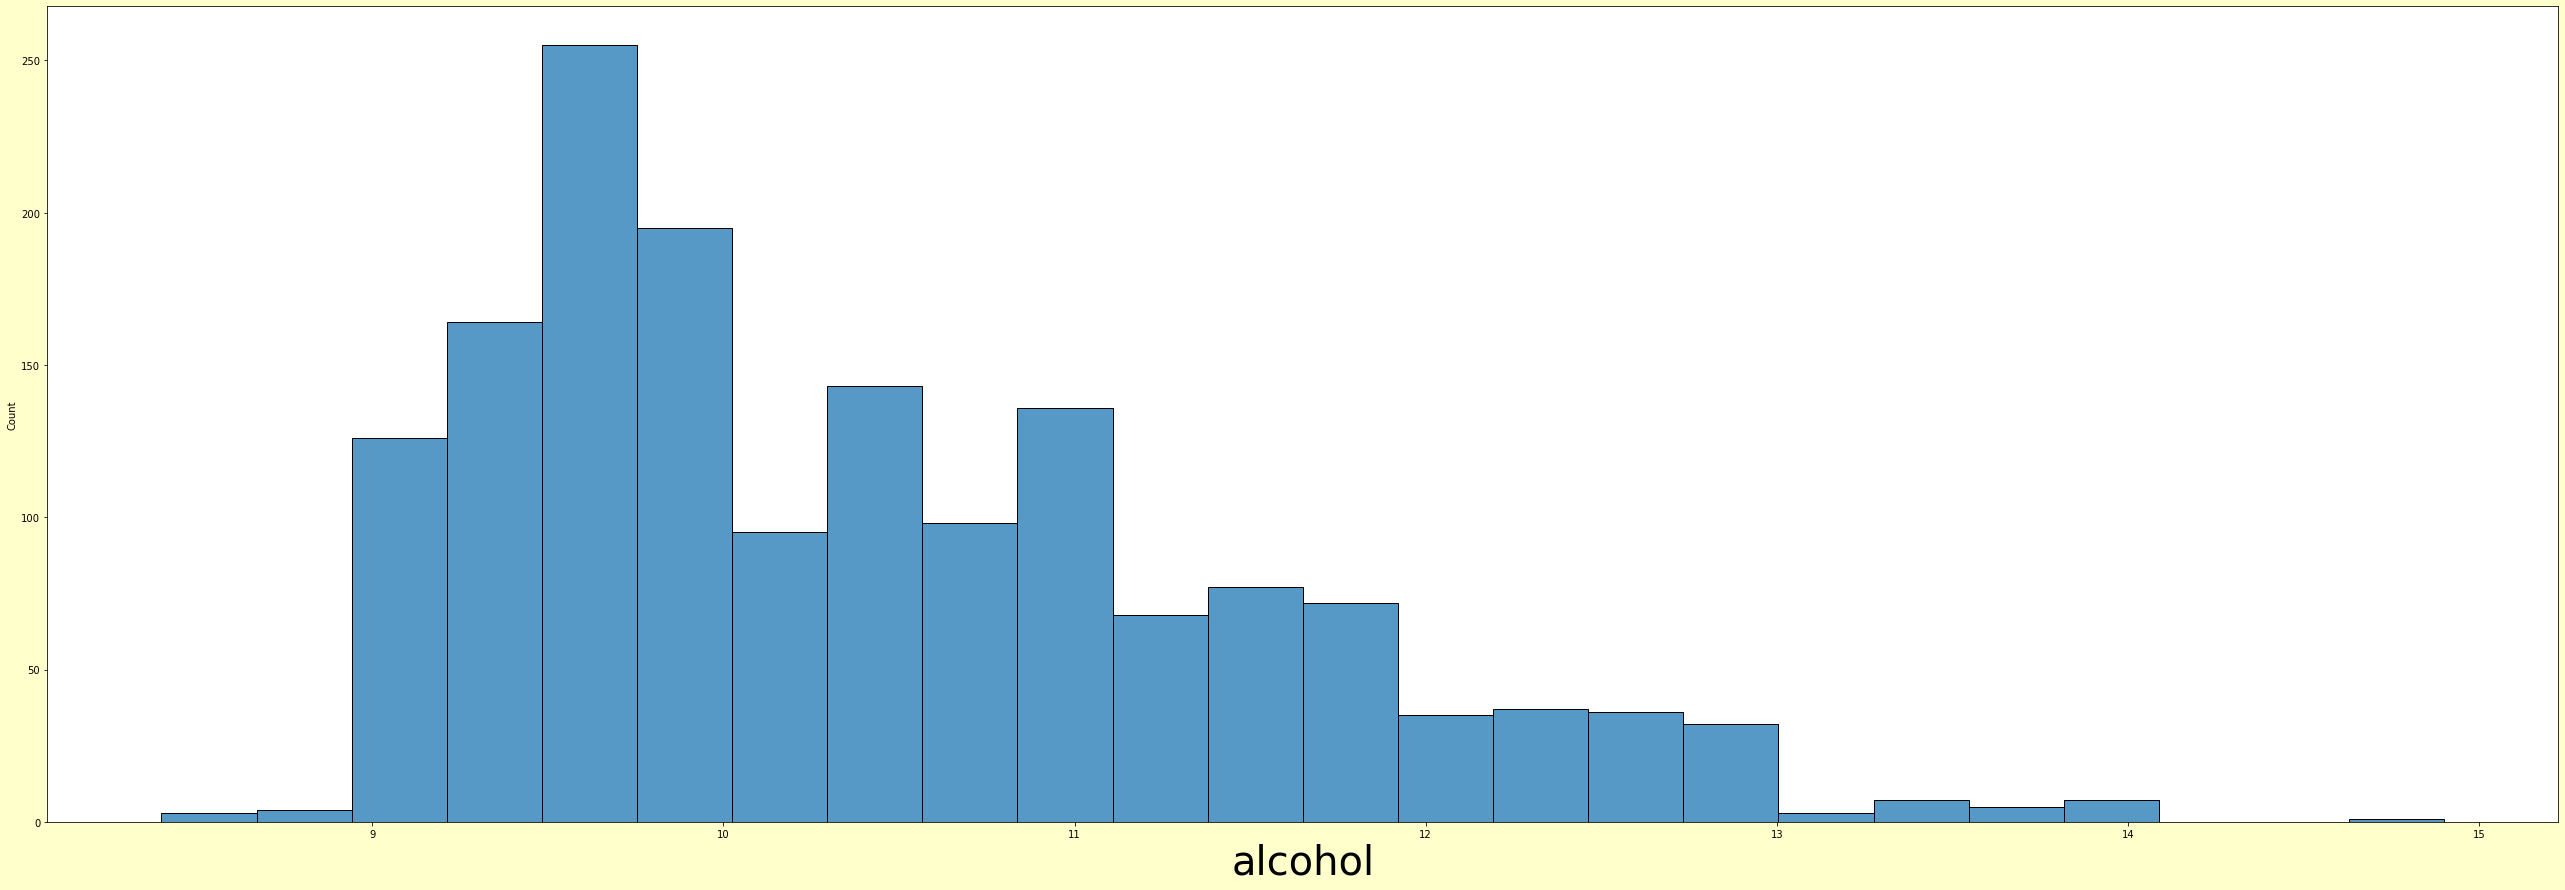

In [194]:
#histplot visualization of 'alcohol'
print(df_wine['alcohol'].value_counts())
sns.histplot(df_wine['alcohol'])

plt.xlabel('alcohol',fontsize=40)

Maximum number of win sample contains alcohol in the range of 9 to 11.5.

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


Text(0.5, 0, 'quality')

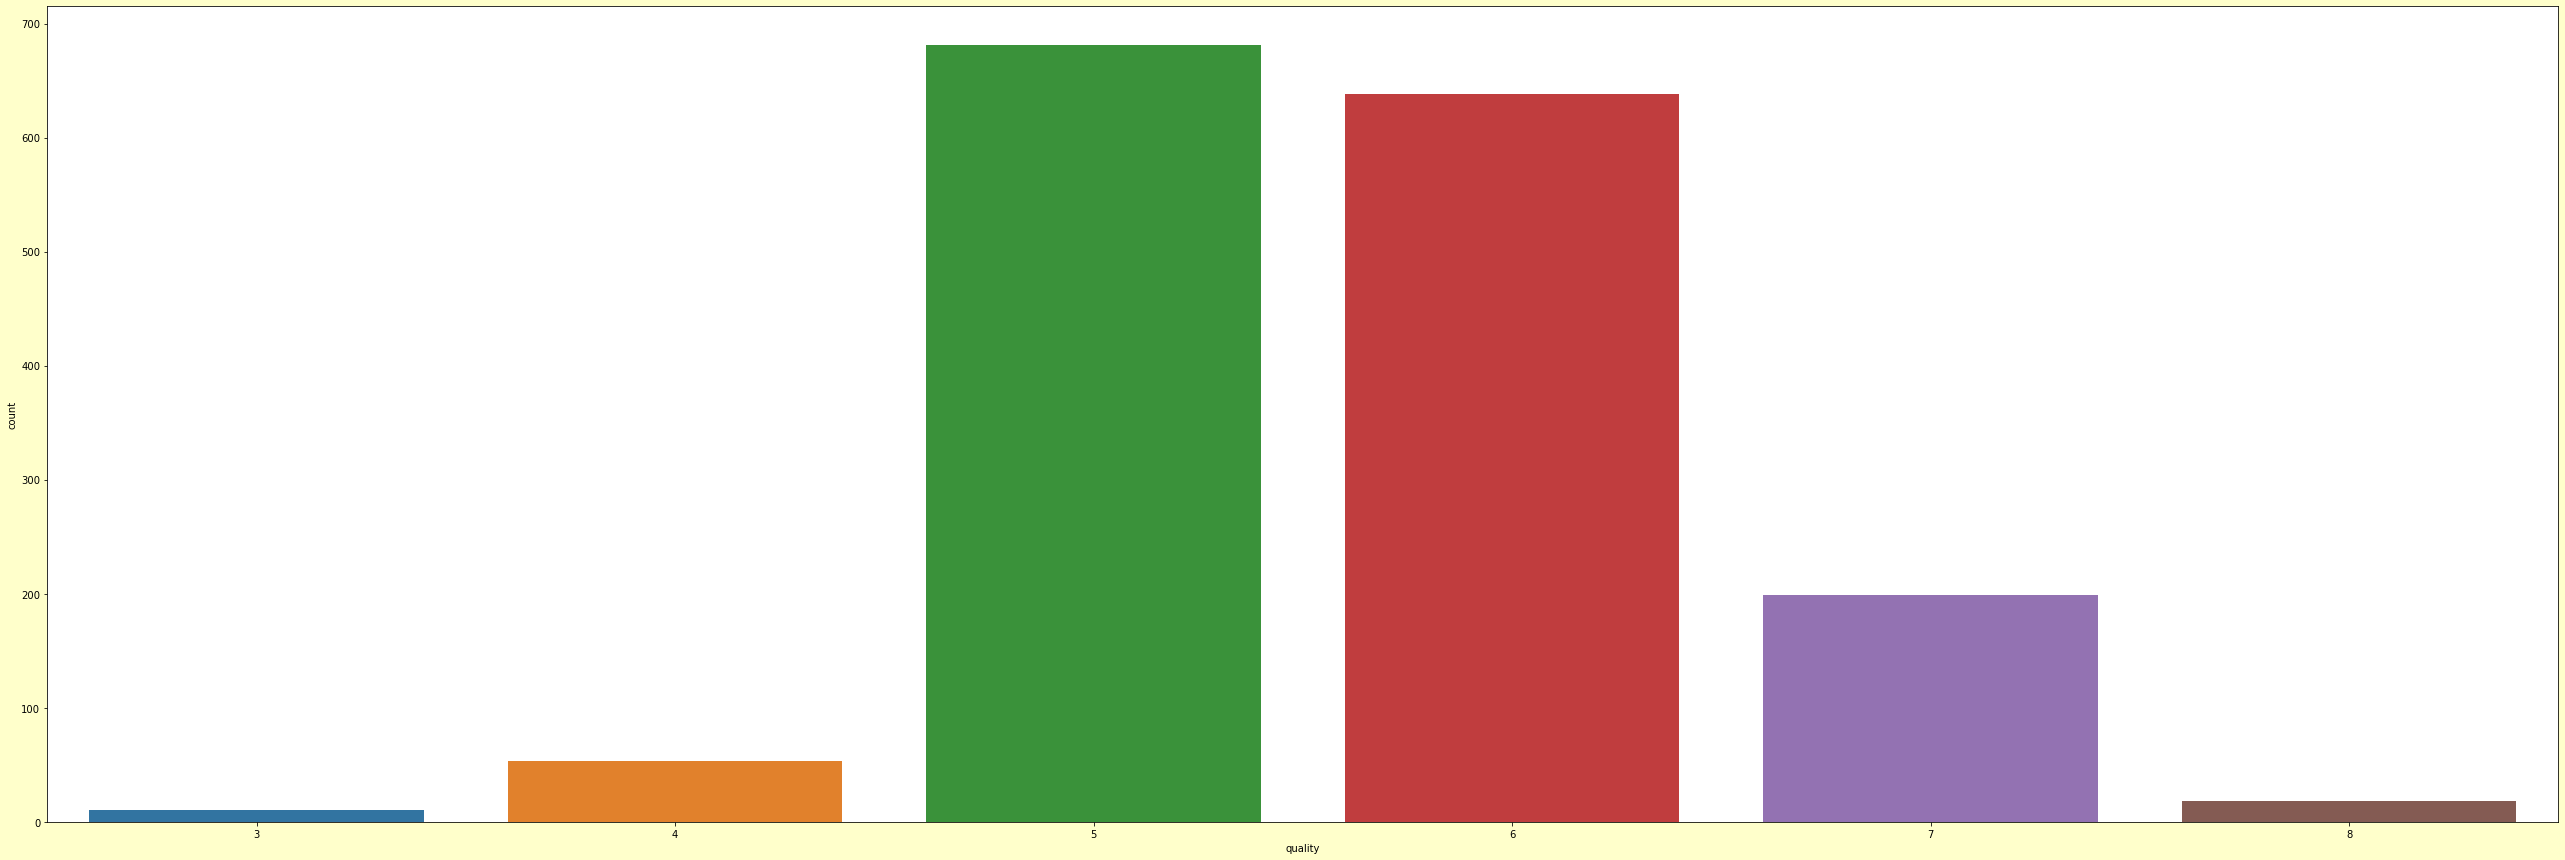

In [195]:
#histplot visualization of 'quality'
print(df_wine['quality'].value_counts())
sns.countplot(df_wine['quality'])

plt.xlabel('quality',fontsize=10)

In [196]:
#Calculate % of 5 and 6 type quality win in whole data
quality_5and6_percentage=(681+638)/1599*100
quality_5and6_percentage

82.48905565978737

Almost 82% of data is of 5 and 6 quality type .So we can say that the data is quietly imbalanced  type will have to make it balance in preprocessing stage.

#### Bivariate Analysis

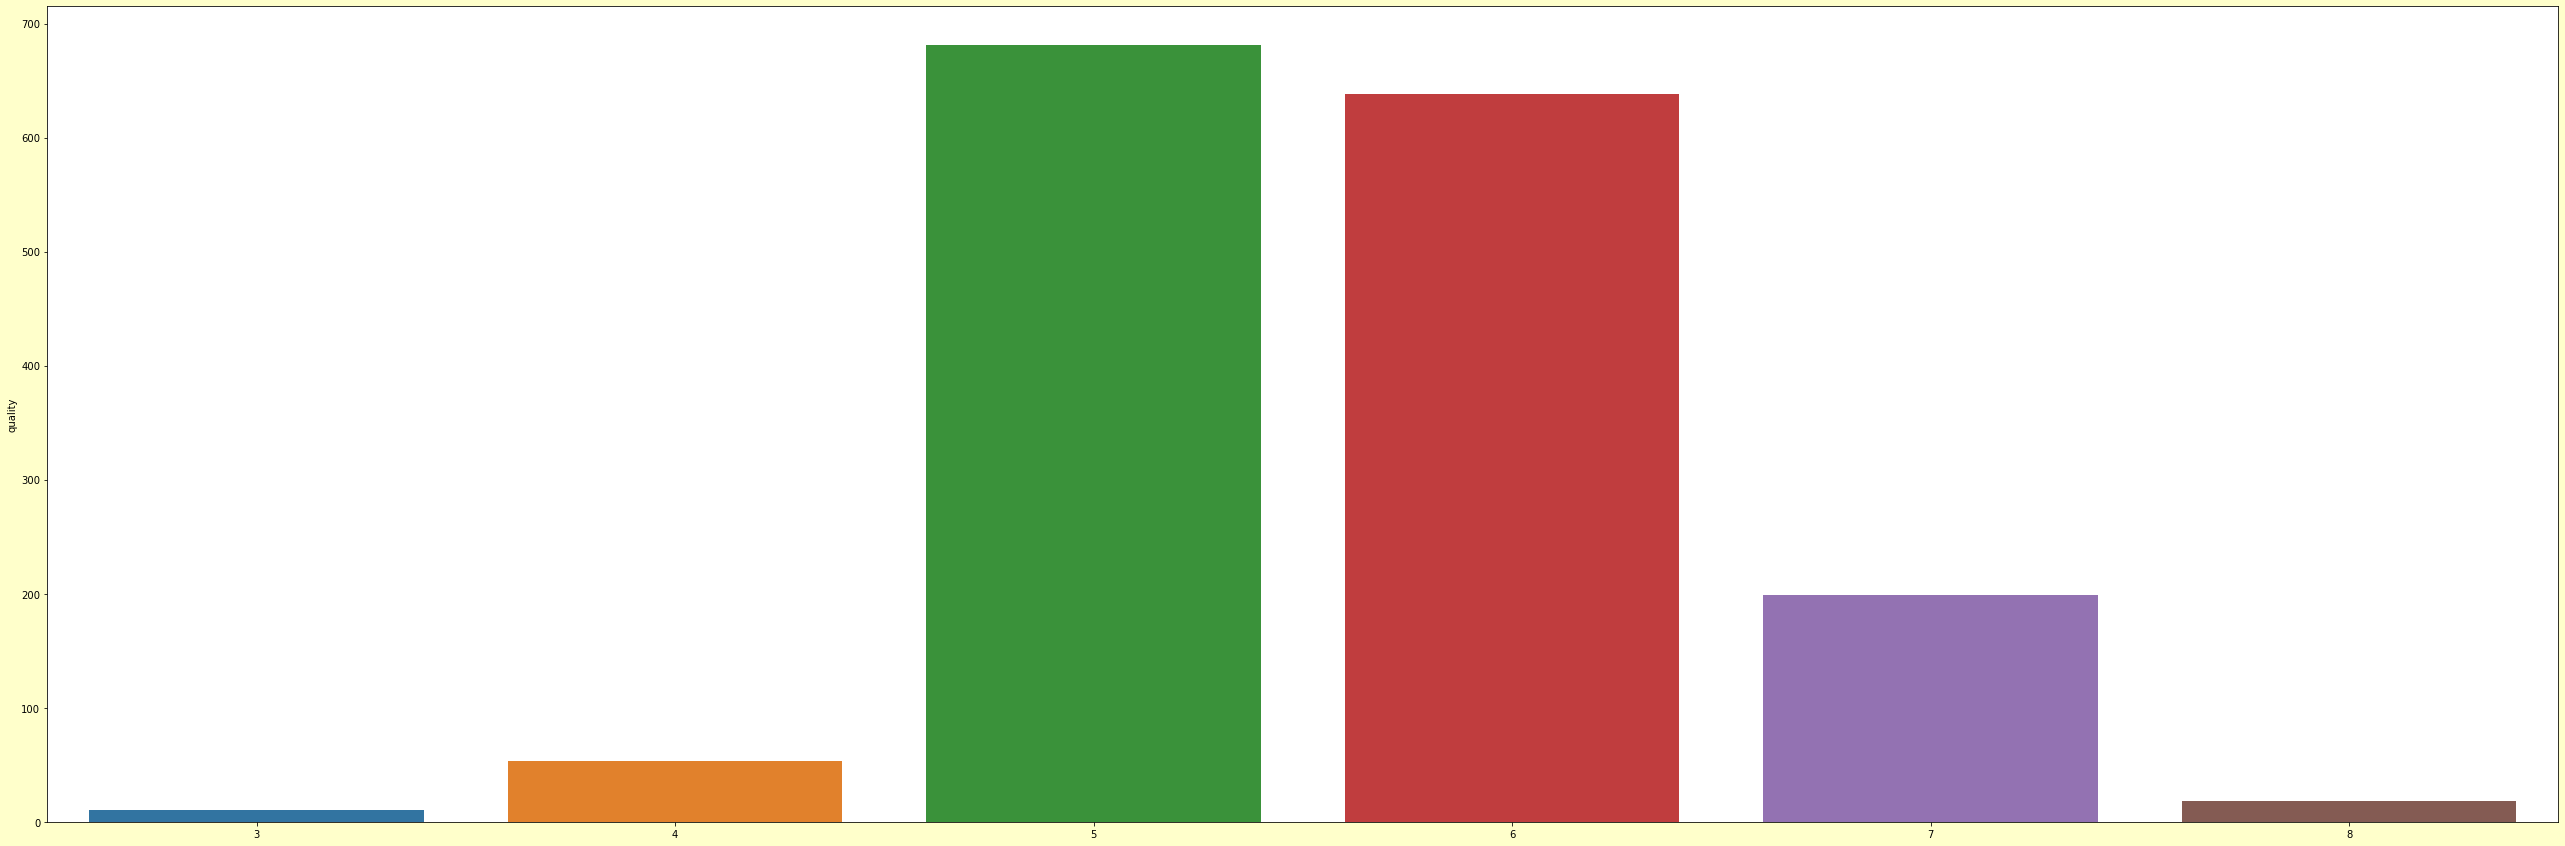

In [197]:
sns.barplot(x=df_wine['quality'].unique() ,y=df_wine['quality'].value_counts())
plt.rcParams['figure.figsize']=(6,7)

In [198]:
df_wine['quality'].value_counts().sort_values()

3     10
8     18
4     53
7    199
6    638
5    681
Name: quality, dtype: int64

Oservation:Maximum no of wine records has quality '5,6,7' .Heighest is of quality '5' .

Text(0.5, 1.0, 'Quality Vs Fixed Acidity')

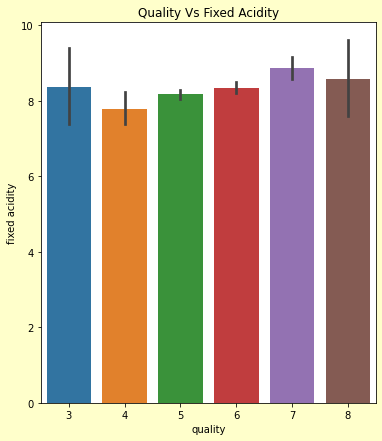

In [199]:
#lets check "fixed acidity" effect on "quality"
sns.barplot(x=df_wine['quality'],y=df_wine['fixed acidity'])
plt.title("Quality Vs Fixed Acidity")

Observation:It's not giving much clear idea .

Text(0.5, 1.0, 'Quality Vs volatile acidity')

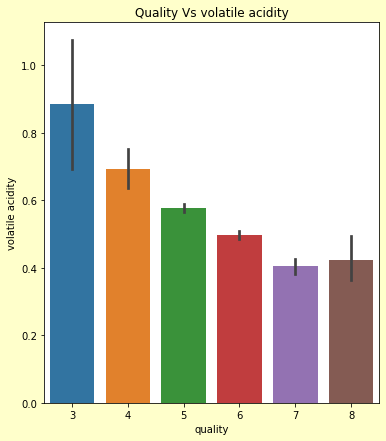

In [200]:
#lets check "volatile acidity" effect on "quality"
sns.barplot(x=df_wine['quality'],y=df_wine['volatile acidity'])
plt.title("Quality Vs volatile acidity")

Observation:
    Its very much clear that "quality" increases "volatile acidity" decreses .That means its in "inverse proportion" means '-ve correlation' between these parametters ..

Text(0.5, 1.0, 'Quality Vs citric acid')

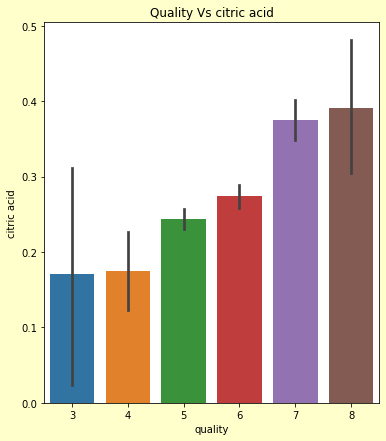

In [201]:
#lets check "citric acid" effect on "quality"
sns.barplot(x=df_wine['quality'],y=df_wine['citric acid'])
plt.title("Quality Vs citric acid")

Observation:
    Its very much clear that "quality" increases "citric acid" increses .That means its in "direct proportion" means "+ve correlation" between these parametters .

Text(0.5, 1.0, 'Quality Vs Residual Sugar')

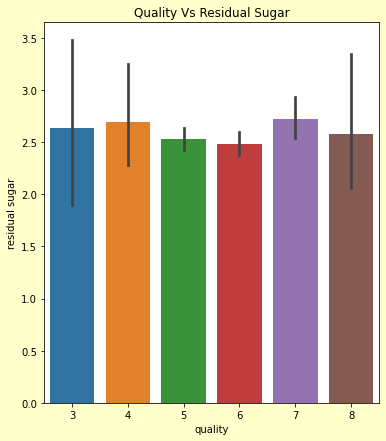

In [202]:
#lets check "residual sugar" effect on "quality"
sns.barplot(x=df_wine['quality'],y=df_wine['residual sugar'])
plt.title("Quality Vs Residual Sugar")

Text(0.5, 1.0, 'Quality Vs Chlorides')

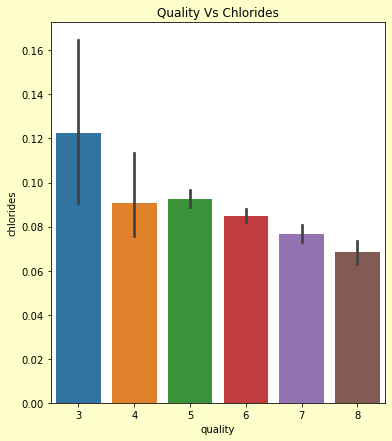

In [203]:
#lets check "chlorides" effect on "quality"
sns.barplot(x=df_wine['quality'],y=df_wine['chlorides'])

plt.title("Quality Vs Chlorides")

Observation:
    Its very much clear that "quality" increases "chlorides" decreses .That means its in "inverse proportion" means '-ve correlation' between these parametters ..

Text(0.5, 1.0, 'Quality Vs Free Sulfur Dioxide')

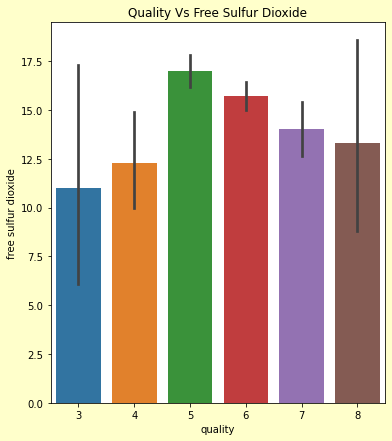

In [204]:
#lets check "free sulfur dioxide" effect on "quality"
sns.barplot(x=df_wine['quality'],y=df_wine['free sulfur dioxide'])
plt.title("Quality Vs Free Sulfur Dioxide")

Observation:Quality 5 is heighest free sulfur dioxide type of wine.

Text(0.5, 1.0, 'Quality Vs Total Sulfur Dioxide')

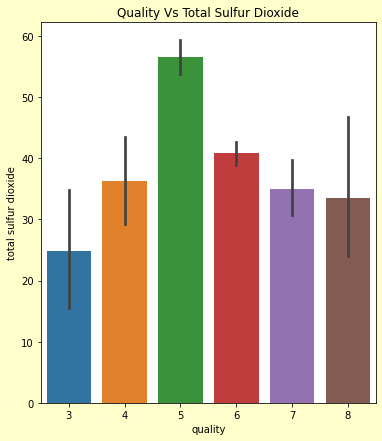

In [205]:
#lets check "total sulfur dioxide" effect on "quality"
sns.barplot(x=df_wine['quality'],y=df_wine['total sulfur dioxide'])
plt.title("Quality Vs Total Sulfur Dioxide")

Observation:
   Quality 5 type of wine contains heighest sulphur dioxide .

Text(0.5, 1.0, 'Quality Vs Density')

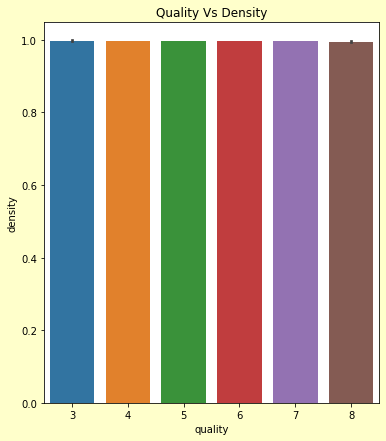

In [206]:
#lets check "density" effect on "quality"
sns.barplot(x=df_wine['quality'],y=df_wine['density'])
plt.title("Quality Vs Density")

Observation:all types of wines are having density around 1

Text(0.5, 1.0, 'Quality Vs pH')

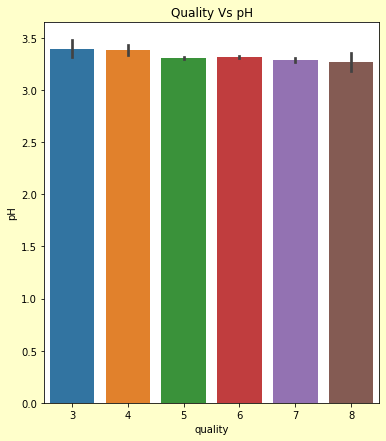

In [207]:
#lets check "pH" effect on "quality"
sns.barplot(x=df_wine['quality'],y=df_wine['pH'])
plt.title("Quality Vs pH")

Observation:
    We can observe "PH" value is between 3.2-3.4. for quality 8 PH is lowest.

Text(0.5, 1.0, 'Quality Vs Sulphates')

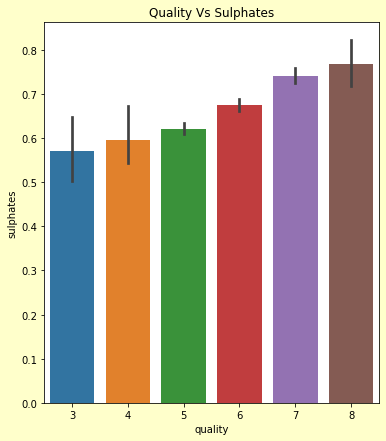

In [208]:
#lets check "sulphates" effect on "quality"
sns.barplot(x=df_wine['quality'],y=df_wine['sulphates'])
plt.title("Quality Vs Sulphates")

Observation:
    Its very much clear that "quality" increases "sulphates" increses .That means its in "direct proportion" means "+ve correlation" between these parametters .

Text(0.5, 1.0, 'Quality Vs Alcohol')

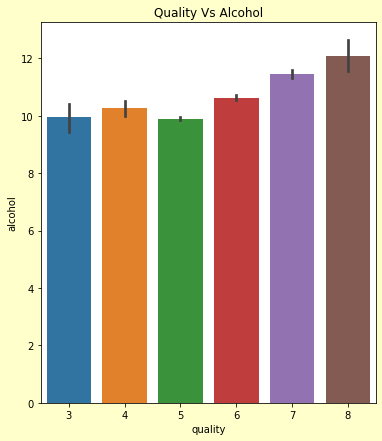

In [209]:
#lets check "alcohol" effect on "quality"
sns.barplot(x=df_wine['quality'],y=df_wine['alcohol'])
plt.title("Quality Vs Alcohol")

Observation:
    Its very much clear that as "quality" increases "alcohol" content also increses .That means its in "direct proportion" means "+ve correlation" between these parametters .

#### Multivariate Analysis

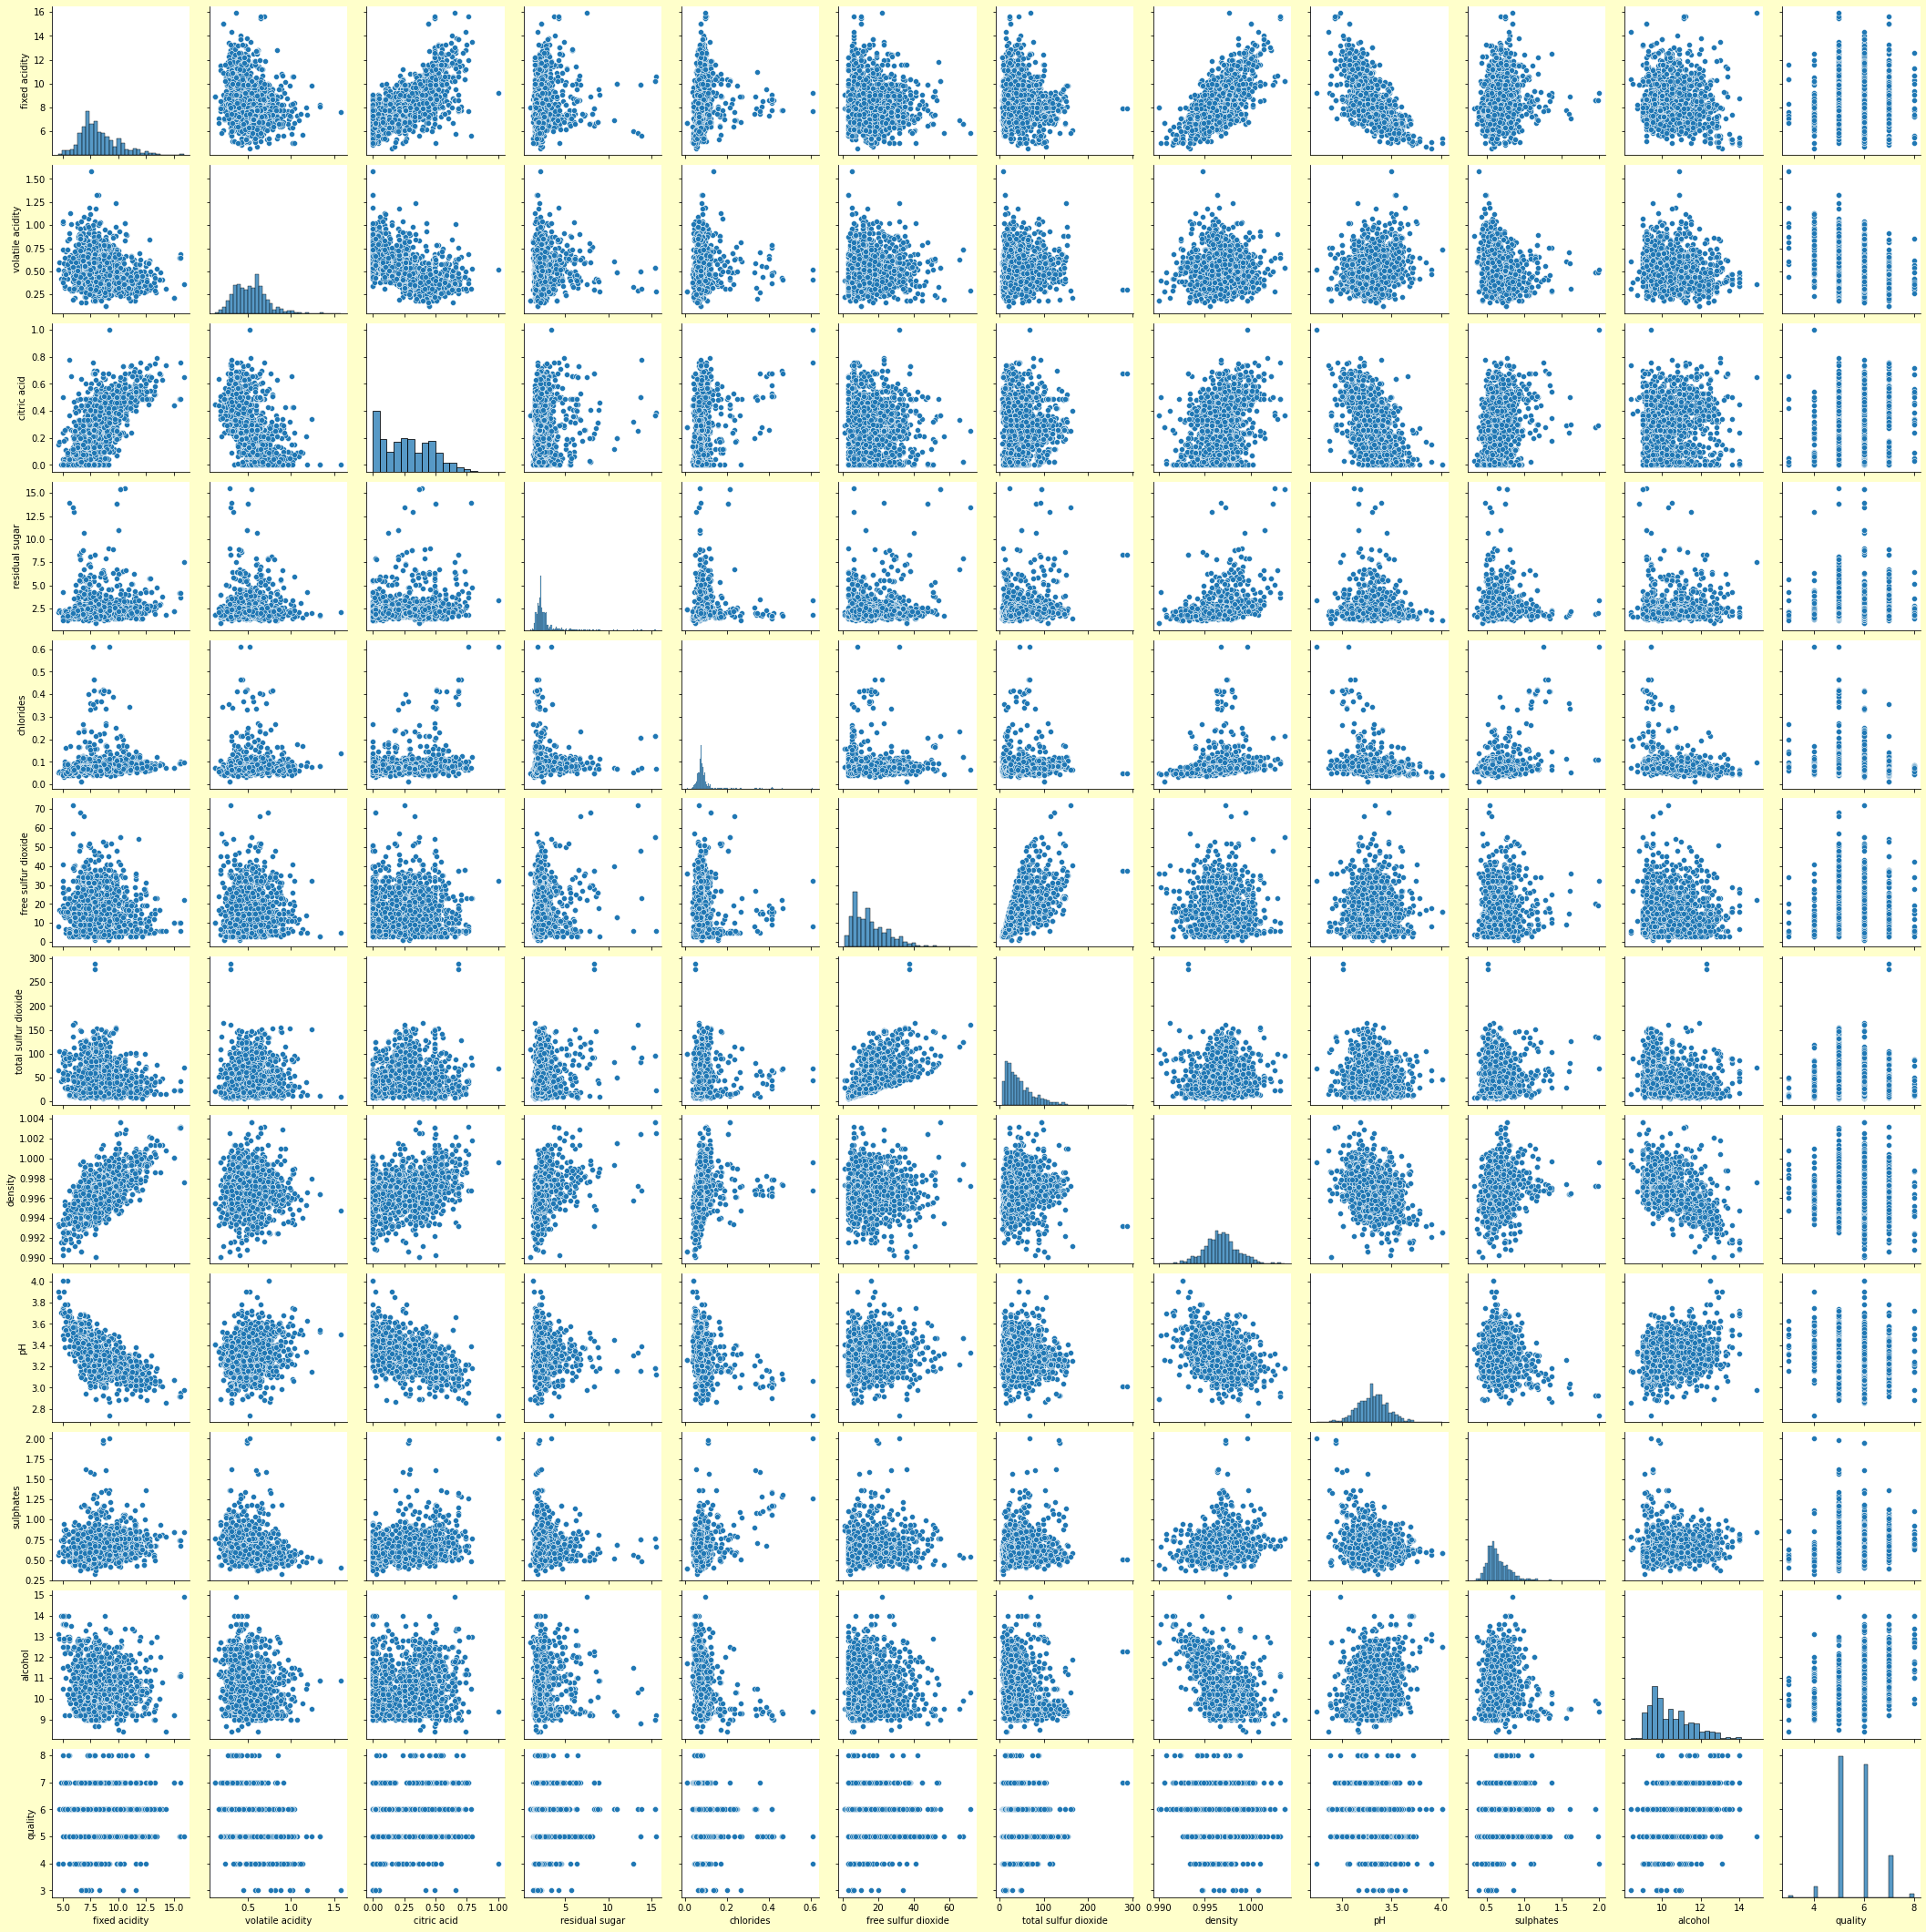

In [210]:
#Compairing all against each other using pairplot
sns.pairplot(df_wine ,palette='white')

1)'Fixed acidity' shows Positive correlation with "Density" and "Citric Acidity' and have Negative correlation with 'pH'.    
2)'Free Sulphur' shows Positive correlation with "Total Sulphur Dioxide".   
3)'Density' and' Alcohol' has Negative correlation with each other.

#### Correlation checking

In [21]:
# corelation of each feature with quality(target) in descending order
df_wine.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.308642
citric acid             0.226373
fixed acidity           0.114238
residual sugar          0.023533
free sulfur dioxide    -0.050087
pH                     -0.057731
total sulfur dioxide   -0.170143
density                -0.174919
chlorides              -0.176140
volatile acidity       -0.391249
Name: quality, dtype: float64

In [23]:
df_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Text(0.5, 1.0, 'Correlation with target')

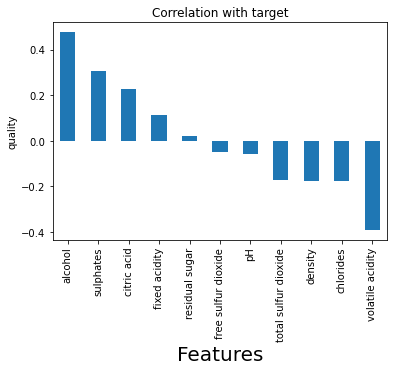

In [22]:
df_wine.corr()['quality'].sort_values(ascending=False).drop(['quality']).plot(kind='bar')
plt.xlabel('Features',fontsize=20)
plt.ylabel('quality')
plt.title('Correlation with target')

1)We can observe some features in +ve correlation with target which are ['fixed acidity', 'citric acid','sulphates','residual sugar','alcohol'] .    
2)Features in -ve correlation with target are [ 'volatile acidity', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'quality'] .  
3)alcohol is higest +vely correlated feature where as 'volatile acidity' is higest -vely correlated feature.

#### Seperating Features and Target variables

In [16]:
x=df_wine.drop('quality',axis=1)
y=df_wine['quality']

#### Outlier removal

In [33]:
## lets remove skewness by using power_transform

from sklearn.preprocessing import power_transform
x_new =power_transform(x ,method='yeo-johnson')
cols=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
x=pd.DataFrame(x_new ,columns=cols)



#### Checking for skewness

In [34]:
# checking skewness after transforming data

x.skew()

fixed acidity          -0.054312
volatile acidity        0.038402
citric acid             0.022626
residual sugar         -0.134082
chlorides              -0.387319
free sulfur dioxide     0.008340
total sulfur dioxide    0.003537
density                -0.006352
pH                      0.015568
sulphates              -0.028387
alcohol                -0.012293
dtype: float64

dtype('float64')

After removing outliers we can see there is no skewness present in data.

#### Data Scaling

In [37]:
## Transforming data in same form
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x=pd.dataFrame

array([[-0.43250242,  0.97169383, -1.52872566, ...,  1.27766318,
        -0.57141346, -1.08716973],
       [-0.15108355,  1.78063624, -1.52872566, ..., -0.71061948,
         0.39669911, -0.47110181],
       [-0.15108355,  1.25076277, -1.25422986, ..., -0.3124338 ,
         0.18862351, -0.47110181],
       ...,
       [-1.3691823 , -0.00316901, -0.68418026, ...,  0.71782099,
         0.81476177,  0.75310701],
       [-1.78672279,  0.70545599, -0.74454222, ...,  1.64313833,
         0.58653292,  0.02467535],
       [-1.67763767, -1.29467444,  1.03128556, ...,  0.52806236,
         0.2601496 ,  0.75310701]])

In [38]:
#separate dataset into train and test

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=3)
x_train.shape ,x_test.shape

((1279, 11), (320, 11))

#### Finding Multicollinearity

In [26]:
## correlation metrics
df_wine.corr() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.263939,0.667163,0.171170,0.198930,-0.177755,-0.113279,0.674770,-0.706360,0.197907,-0.098852,0.114238
volatile acidity,-0.263939,1.000000,-0.564957,0.037778,0.127886,0.036517,0.098941,0.045426,0.223115,-0.294738,-0.228623,-0.391249
citric acid,0.667163,-0.564957,1.000000,0.172286,0.181780,-0.089146,-0.003637,0.364947,-0.541904,0.331516,0.109903,0.226373
residual sugar,0.171170,0.037778,0.172286,1.000000,0.117102,0.093839,0.152920,0.417538,-0.091241,0.024800,0.080569,0.023533
chlorides,0.198930,0.127886,0.181780,0.117102,1.000000,-0.013597,0.073285,0.351939,-0.283629,0.243076,-0.303961,-0.176140
free sulfur dioxide,-0.177755,0.036517,-0.089146,0.093839,-0.013597,1.000000,0.784622,-0.039642,0.095763,0.054068,-0.082672,-0.050087
total sulfur dioxide,-0.113279,0.098941,-0.003637,0.152920,0.073285,0.784622,1.000000,0.105539,-0.014837,0.052191,-0.230858,-0.170143
density,0.674770,0.045426,0.364947,0.417538,0.351939,-0.039642,0.105539,1.000000,-0.341699,0.166124,-0.496180,-0.174919
pH,-0.706360,0.223115,-0.541904,-0.091241,-0.283629,0.095763,-0.014837,-0.341699,1.000000,-0.154116,0.205633,-0.057731
sulphates,0.197907,-0.294738,0.331516,0.024800,0.243076,0.054068,0.052191,0.166124,-0.154116,1.000000,0.135156,0.308642


<AxesSubplot:>

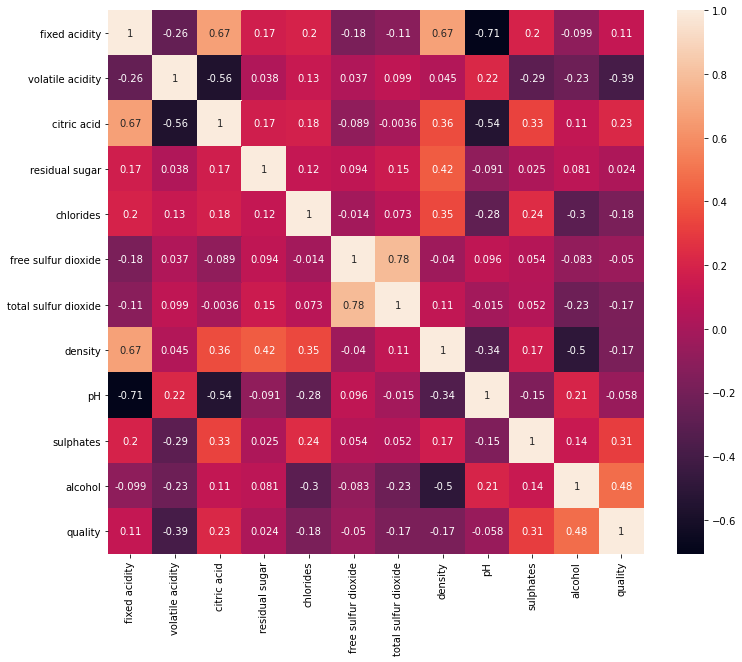

In [27]:
#visualizing correlation using pearson correlation
plt.figure(figsize=(12,10))
cor=df_wine.corr()
sns.heatmap(cor ,annot=True )

In [39]:
# function to select for highly correlated features. 
#will remove first feature which is highly correlared with any other feature

def correlation(dataset , threshold):
    col_corr =set() # set of all names of correlated features we have taken st from preventing duplicate entries of columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            # here will not use abs() function
            if(corr_matrix.iloc[i,j]> threshold):
                col_name=corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

In [48]:
cols=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
x_cor=pd.DataFrame(x ,columns=cols)
x=pd.DataFrame(x ,columns=cols)
cor_features=correlation(x_cor ,0.66)
len(cor_features)

2

In [41]:
cor_features

{'density', 'total sulfur dioxide'}

#### Dealing Multicollinearity

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# the independent variables set
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif=[]

for i in range(len(x.columns)):
    vif.append(variance_inflation_factor(x.values ,i))
vif_data["VIF"]=vif    
    
print(vif_data)


                 feature       VIF
0          fixed acidity  6.494479
1       volatile acidity  1.875635
2            citric acid  2.872239
3         residual sugar  1.738080
4              chlorides  1.381368
5    free sulfur dioxide  2.835876
6   total sulfur dioxide  3.178068
7                density  5.779935
8                     pH  3.105324
9              sulphates  1.363367
10               alcohol  2.629725


so will drop the features which have VIF>5 ,here we can see fixed acidity  6.498474 and density  5.779935 will drop them

In [52]:
x_new=x.drop(['density' ,'fixed acidity'],axis=1)

In [54]:
x=pd.DataFrame(x_new , columns=x_new.columns )
x

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
0,0.971694,-1.528726,-0.558213,-0.168088,-0.273236,-0.127244,1.277663,-0.571413,-1.087170
1,1.780636,-1.528726,0.511169,0.670167,0.991979,0.852947,-0.710619,0.396699,-0.471102
2,1.250763,-1.254230,0.139848,0.470422,0.184775,0.536886,-0.312434,0.188624,-0.471102
3,-1.532280,1.400207,-0.558213,-0.214191,0.376771,0.690807,-0.979962,-0.382219,-0.471102
4,0.971694,-1.528726,-0.558213,-0.168088,-0.273236,-0.127244,1.277663,-0.571413,-1.087170
...,...,...,...,...,...,...,...,...,...
1594,0.478891,-0.993217,-0.354191,0.399569,1.403166,0.240378,0.906002,-0.382219,0.332037
1595,0.216348,-0.867403,-0.008301,-0.904314,1.741858,0.453763,1.339002,0.867807,0.896358
1596,-0.003169,-0.684180,0.139848,-0.168088,1.237641,0.103694,0.717821,0.814762,0.753107
1597,0.705456,-0.744542,-0.354191,-0.214191,1.403166,0.240378,1.643138,0.586533,0.024675


#### Outliers finding and data cleaning

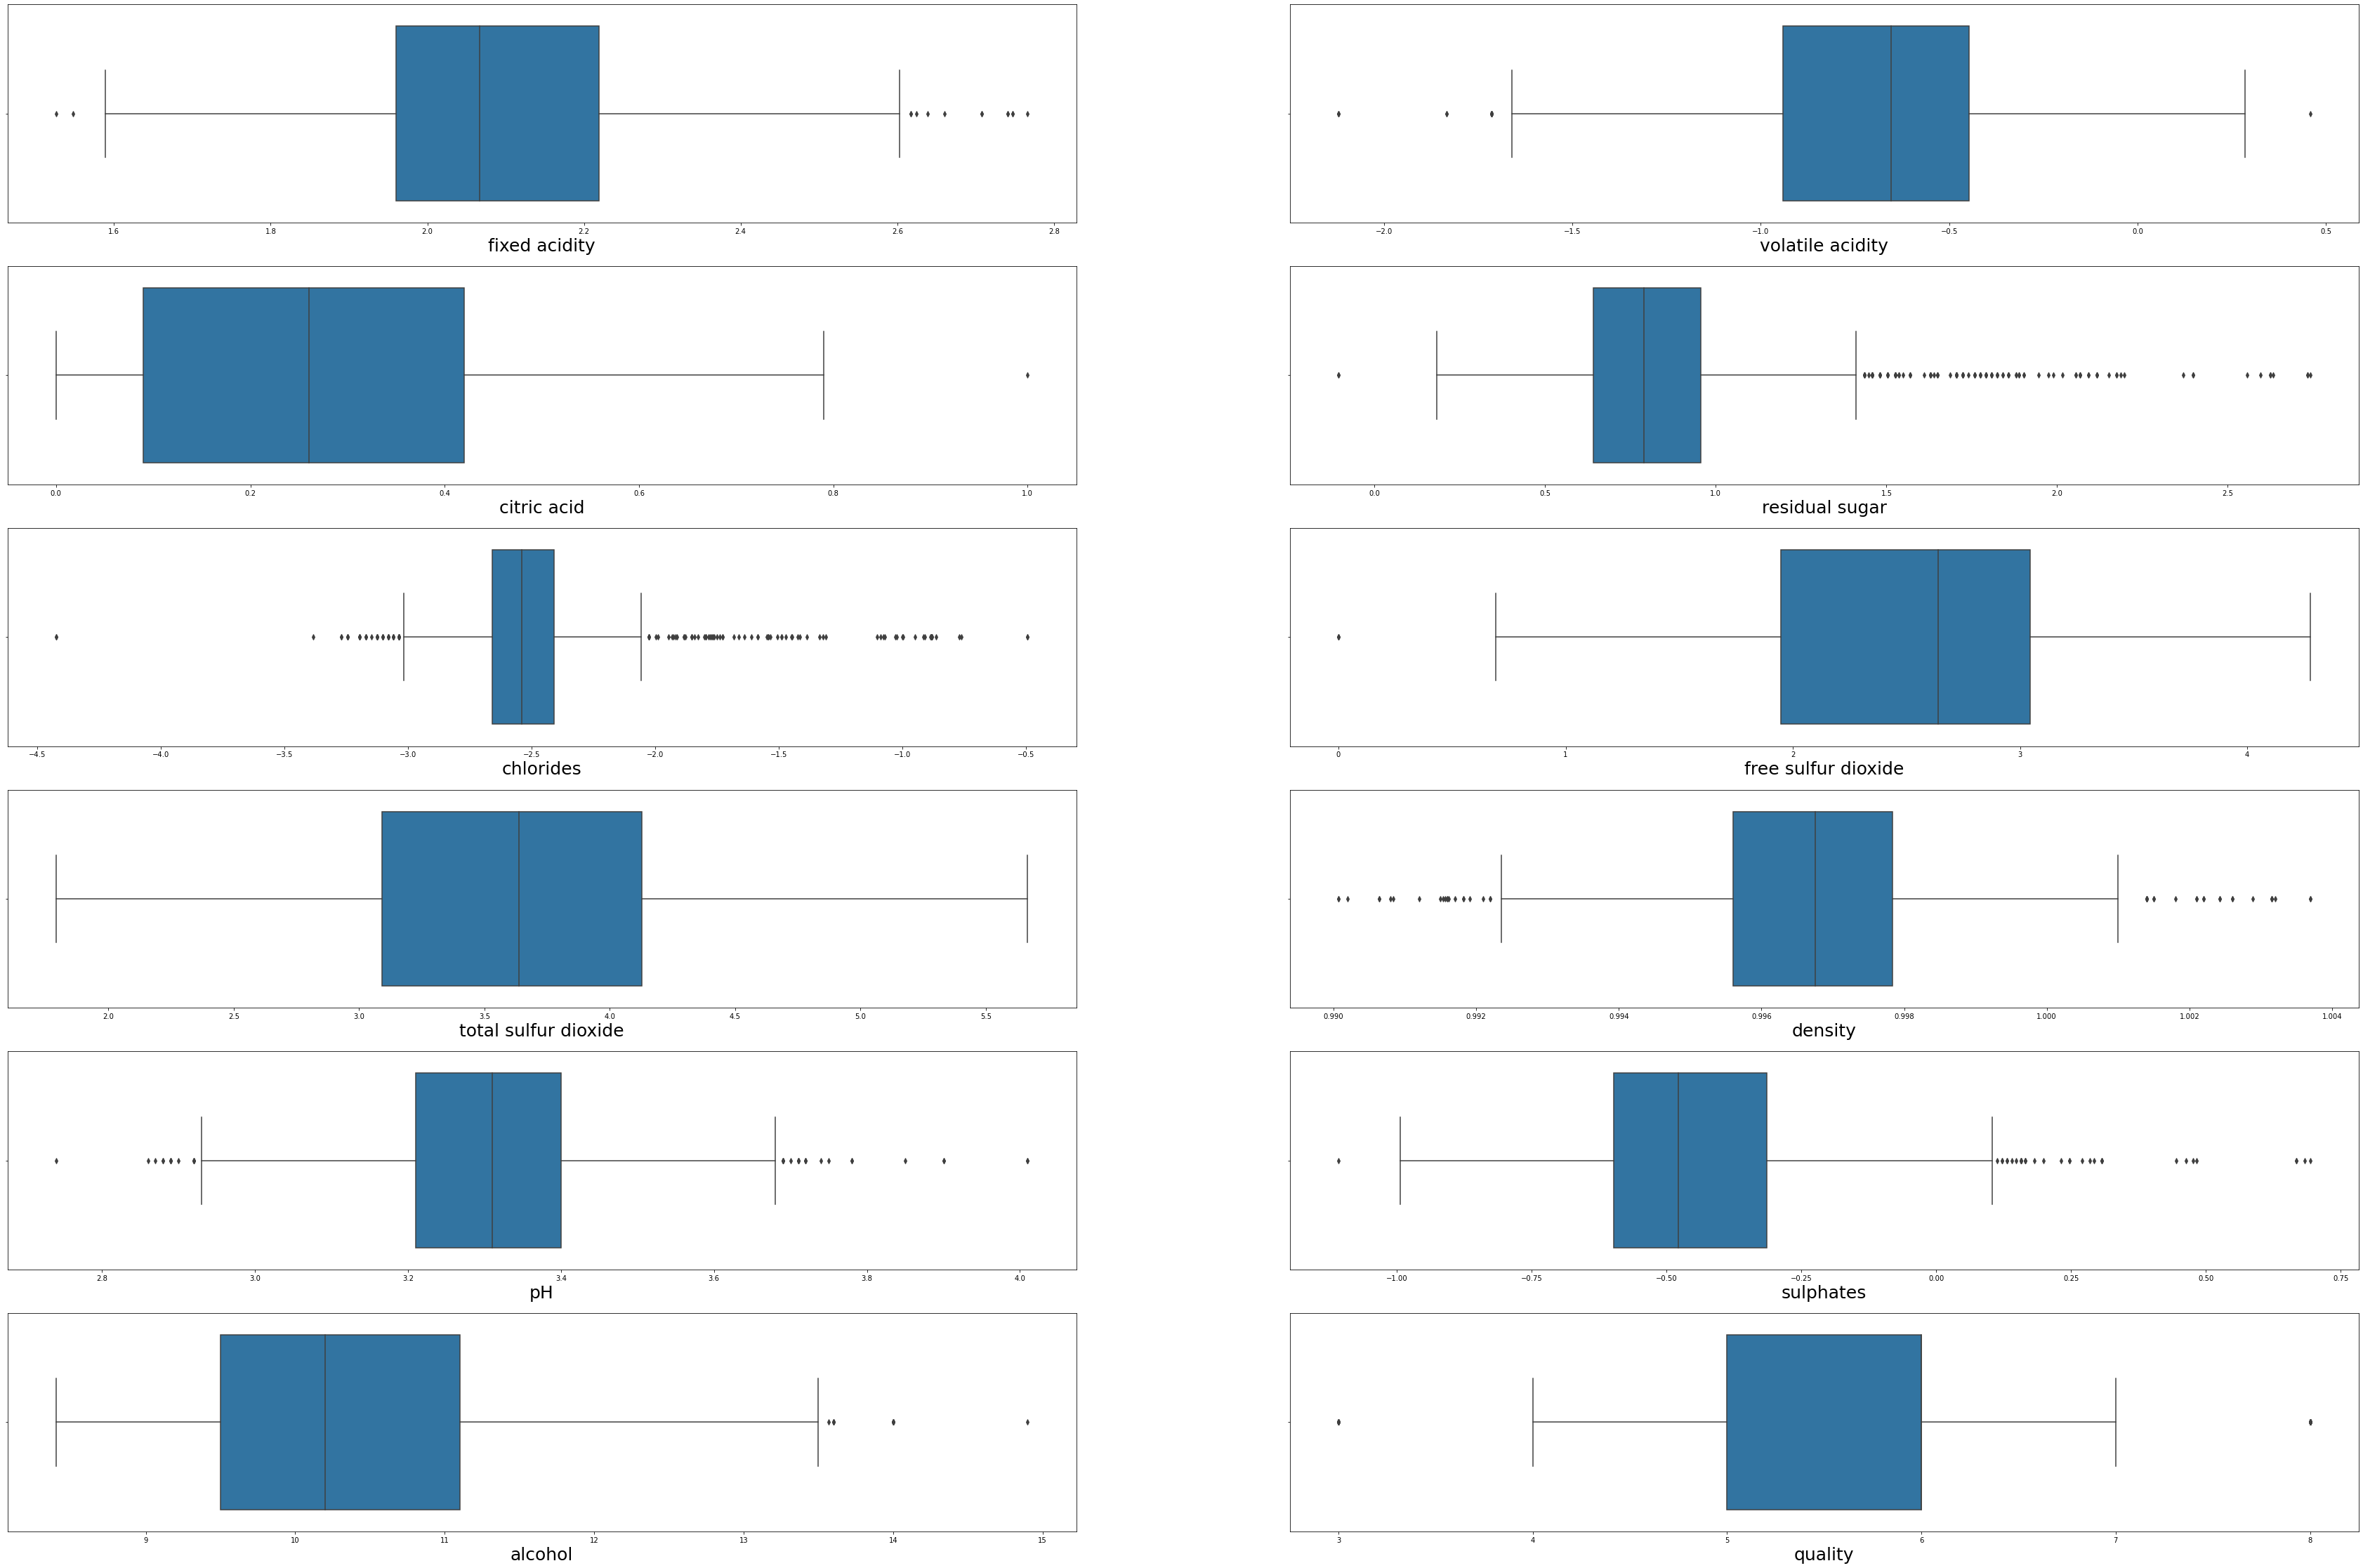

In [55]:
plt.figure(figsize=(60,40))
figcount=1
for i in df_wine.columns:
    if figcount<=12:
        if df_wine[i].dtype!='object':
            plt.subplot(6,2,figcount)
            sns.boxplot(df_wine[i])
            plt.xlabel(i,size=25)
            plt.yticks(rotation=0,fontsize=8)
            figcount+=1


1)From above box plot we can observe all columns [fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol] are having outliers will have to remove the outliers in the preprocessing stage.    
2)Since quality is target variable will not remove outliers from it. 

#### IQR Zscore method to deal with Outliers

In [56]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(x))
z.shape

(1599, 9)

In [57]:
threshold=3
#print index no
print("Indexes at which Outliers are present.")
print(np.where(z>3))


Indexes at which Outliers are present.
(array([   7,   17,   19,   42,   45,   81,   83,   86,   91,   92,   95,
        106,  126,  127,  151,  151,  151,  169,  170,  181,  198,  226,
        240,  258,  281,  291,  451,  469,  480,  517,  530,  535,  544,
        544,  614,  672,  690,  692,  695,  695,  730,  754,  773,  836,
        837,  909,  914,  948,  949,  950, 1017, 1018, 1051, 1079, 1081,
       1165, 1260, 1287, 1299, 1316, 1316, 1319, 1321, 1321, 1369, 1370,
       1372, 1374, 1374, 1434, 1435, 1436], dtype=int64), array([2, 3, 3, 3, 6, 3, 3, 7, 7, 7, 6, 3, 0, 0, 3, 6, 7, 3, 7, 3, 2, 3,
       3, 3, 3, 3, 3, 2, 2, 8, 4, 4, 6, 8, 6, 0, 0, 3, 3, 6, 3, 3, 4, 3,
       3, 2, 2, 0, 0, 0, 2, 2, 3, 5, 5, 3, 3, 7, 0, 2, 6, 3, 2, 6, 7, 3,
       3, 2, 3, 2, 2, 8], dtype=int64))


In [58]:
len(np.where(z>3)[0])

72

In [60]:
#loss =100- data preserved
loss =100-(1599-72)/1599*100
loss

4.502814258911826

since data loss is very less will drop the outliers

In [ ]:
x_new=x.drop([   7,   17,   19,   42,   45,   81,   83,   86,   91,   92,   95,
        106,  126,  127,  151,  151,  151,  169,  170,  181,  198,  226,
        240,  258,  281,  291,  451,  469,  480,  517,  530,  535,  544,
        544,  614,  672,  690,  692,  695,  695,  730,  754,  773,  836,
        837,  909,  914,  948,  949,  950, 1017, 1018, 1051, 1079, 1081,
       1165, 1260, 1287, 1299, 1316, 1316, 1319, 1321, 1321, 1369, 1370,
       1372, 1374, 1374, 1434, 1435, 1436],axis=0)

x=x_new

In [69]:
y=y.drop([   7,   17,   19,   42,   45,   81,   83,   86,   91,   92,   95,
        106,  126,  127,  151,  151,  151,  169,  170,  181,  198,  226,
        240,  258,  281,  291,  451,  469,  480,  517,  530,  535,  544,
        544,  614,  672,  690,  692,  695,  695,  730,  754,  773,  836,
        837,  909,  914,  948,  949,  950, 1017, 1018, 1051, 1079, 1081,
       1165, 1260, 1287, 1299, 1316, 1316, 1319, 1321, 1321, 1369, 1370,
       1372, 1374, 1374, 1434, 1435, 1436],axis=0)

In [66]:
x

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
0,0.971694,-1.528726,-0.558213,-0.168088,-0.273236,-0.127244,1.277663,-0.571413,-1.087170
1,1.780636,-1.528726,0.511169,0.670167,0.991979,0.852947,-0.710619,0.396699,-0.471102
2,1.250763,-1.254230,0.139848,0.470422,0.184775,0.536886,-0.312434,0.188624,-0.471102
3,-1.532280,1.400207,-0.558213,-0.214191,0.376771,0.690807,-0.979962,-0.382219,-0.471102
4,0.971694,-1.528726,-0.558213,-0.168088,-0.273236,-0.127244,1.277663,-0.571413,-1.087170
...,...,...,...,...,...,...,...,...,...
1594,0.478891,-0.993217,-0.354191,0.399569,1.403166,0.240378,0.906002,-0.382219,0.332037
1595,0.216348,-0.867403,-0.008301,-0.904314,1.741858,0.453763,1.339002,0.867807,0.896358
1596,-0.003169,-0.684180,0.139848,-0.168088,1.237641,0.103694,0.717821,0.814762,0.753107
1597,0.705456,-0.744542,-0.354191,-0.214191,1.403166,0.240378,1.643138,0.586533,0.024675


In [70]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1534, dtype: int64

#### convert imbalanced dataset into balanced dataset by using SMOT

In [98]:
from imblearn.over_sampling import SMOTE

count=y.shape
print('Before sampling count:',count)
#oversampling dataset using SMOT
smt=SMOTE(k_neighbors=3)
x_smt,y_smt=smt.fit_resample(x,y)
count_smt=y_smt.shape
print('after sampling count:',count_smt)

Before sampling count: (1534,)
after sampling count: (3942,)


In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,classification_report,confusion_matrix
lr=LogisticRegression()

####  will try to find out best value Random State

In [100]:
for i in range (0,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100 ,1)== round(accuracy_score(y_test,pred_test)*100 ,1):
        print("At random state ",i,"model performs very well")
        print("Random state value is :",i)
        print("Training accuracy score is :",round(accuracy_score(y_train,pred_train)*100 ,1))
        print("Testing accuracy score is :", round(accuracy_score(y_test,pred_test)*100 ,1),'\n\n')
        

At random state  20 model performs very well
Random state value is : 20
Training accuracy score is : 60.6
Testing accuracy score is : 60.6 


At random state  101 model performs very well
Random state value is : 101
Training accuracy score is : 60.3
Testing accuracy score is : 60.3 


At random state  120 model performs very well
Random state value is : 120
Training accuracy score is : 60.3
Testing accuracy score is : 60.3 


At random state  202 model performs very well
Random state value is : 202
Training accuracy score is : 60.3
Testing accuracy score is : 60.3 


At random state  369 model performs very well
Random state value is : 369
Training accuracy score is : 59.9
Testing accuracy score is : 59.9 


At random state  462 model performs very well
Random state value is : 462
Training accuracy score is : 60.6
Testing accuracy score is : 60.6 


At random state  519 model performs very well
Random state value is : 519
Training accuracy score is : 60.3
Testing accuracy score is : 60

#### will consider Random state = 806 

In [72]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=806 )

In [73]:
from sklearn.metrics import classification_report
print("Classification report :\n")
print(classification_report(y_test,pred_test))

Classification report :

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        10
           5       0.44      0.46      0.45       133
           6       0.37      0.40      0.38       123
           7       0.12      0.11      0.12        35
           8       0.00      0.00      0.00         4

    accuracy                           0.37       307
   macro avg       0.15      0.16      0.16       307
weighted avg       0.35      0.37      0.36       307



In [79]:
from sklearn.model_selection import cross_val_score

pred_lr=lr.predict(x_test)
lr_accu_score = accuracy_score(y_test,pred_lr)
for j in range(2,12):
    lr_crosval_score = cross_val_score(lr,x,y,cv=j)
    lr_crosval_score_mean = lr_crosval_score.mean() 
    print("At Cv:" ,j)
    print("Cross validation score is :",round(lr_crosval_score_mean*100,2))
    
    print("Accuracy score is :" ,round(lr_accu_score*100,2) ,'\n')

At Cv: 2
Cross validation score is : 55.8
Accuracy score is : 61.56 

At Cv: 3
Cross validation score is : 57.89
Accuracy score is : 61.56 

At Cv: 4
Cross validation score is : 59.45
Accuracy score is : 61.56 

At Cv: 5
Cross validation score is : 58.15
Accuracy score is : 61.56 

At Cv: 6
Cross validation score is : 58.54
Accuracy score is : 61.56 

At Cv: 7
Cross validation score is : 58.94
Accuracy score is : 61.56 

At Cv: 8
Cross validation score is : 59.33
Accuracy score is : 61.56 

At Cv: 9
Cross validation score is : 58.62
Accuracy score is : 61.56 

At Cv: 10
Cross validation score is : 59.01
Accuracy score is : 61.56 

At Cv: 11
Cross validation score is : 59.21
Accuracy score is : 61.56 



Since our cross validation score is highest at cv :8 will consider it .

#### Random Forest Classifier

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [84]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("Accuracy score is :",round(accuracy_score(y_test,predrf)*100 ,2))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy score is : 70.03
[[  0   0   2   0   0   0]
 [  1   0   8   1   0   0]
 [  0   0 108  24   1   0]
 [  0   0  29  91   3   0]
 [  0   0   2  18  15   0]
 [  0   0   0   3   0   1]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        10
           5       0.72      0.81      0.77       133
           6       0.66      0.74      0.70       123
           7       0.79      0.43      0.56        35
           8       1.00      0.25      0.40         4

    accuracy                           0.70       307
   macro avg       0.53      0.37      0.40       307
weighted avg       0.68      0.70      0.68       307



In [85]:
from sklearn.svm import SVC

In [86]:
sv = SVC()
sv.fit(x_train,y_train)
predrf=sv.predict(x_test)
print("Accuracy score is :",round(accuracy_score(y_test,predrf)*100 ,2))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy score is : 61.89
[[  0   0   2   0   0   0]
 [  0   0   8   2   0   0]
 [  0   0 105  27   1   0]
 [  0   0  47  73   3   0]
 [  0   0   2  21  12   0]
 [  0   0   0   4   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        10
           5       0.64      0.79      0.71       133
           6       0.57      0.59      0.58       123
           7       0.75      0.34      0.47        35
           8       0.00      0.00      0.00         4

    accuracy                           0.62       307
   macro avg       0.33      0.29      0.29       307
weighted avg       0.59      0.62      0.59       307



After compairing Cross validation score , confusion matrix and accuracy score 
Random forest is performing well amongst all.we will continue with Random forest algorithm.

#### Hyper parameter tuning

In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
#creating parameter list to pass to GridSearchCV
parameters={'max_features':['auto','sqrt','log'],
            'max_depth':[5,6,7,8,9],
             'criterion':['ginni','entropy']}

In [90]:

GS_CV= GridSearchCV(RandomForestClassifier(),parameters ,cv=5, scoring='accuracy')
GS_CV.fit(x_train,y_train)
GS_CV.best_params_

{'criterion': 'entropy', 'max_depth': 9, 'max_features': 'sqrt'}

In [96]:
#prediction with best parameter
gride_pred=GS_CV.predict(x_test) 
# best score 
accuracy_score(y_test,gride_pred)

0.6677524429967426

#### ROC AUC plot

In [106]:
from sklearn import  metrics 
fpr,tpr=metrics.roc_curve(y_test,gride_pred)
roc_auc=metrics.auc(fpr,tpr)
dispaly=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=GS_CV)
dispaly.plot()

ValueError: multiclass format is not supported

#### Saving model in pickel format

In [ ]:
import joblib
joblib.dump(GS_CV.best_estimator_,"Red_wine_quality.pkl")